In [54]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import scipy 
import seaborn as sns
from sklearn.cluster import KMeans

%matplotlib inline

In [32]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

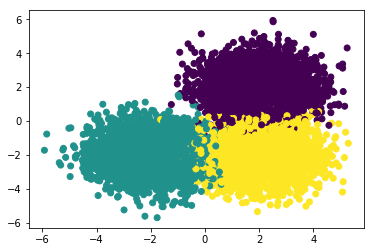

In [84]:
# The cooridnates of the cetners of our blobs
centers = [[2,2], [-2,-2], [2,-2]]

# Make 10,000 rows worth of data with two features representing three clusters
# each having a standard deviation of 1
X, y = make_blobs(n_samples=10000,
                 centers=centers,
                 cluster_std=1,
                 n_features=2,
                 random_state=42)

plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

# Divide into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.9, random_state=42)

In [85]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. this function automatically derives a bandwidth
# number based on an inspection of the distances among data points in the data
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train, y_train)

# Extract cluster assignments for each data point 
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters
n_clusters_ = len(np.unique(labels))

print('Number of estimated clusters: {}'.format(n_clusters_))

Number of estimated clusters: 3


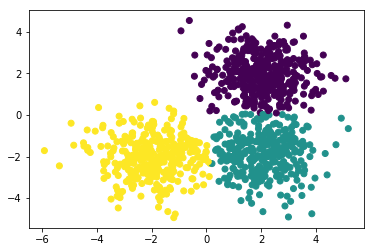

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      352   10    0
1        1    8  311
2        6  304    8


In [86]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

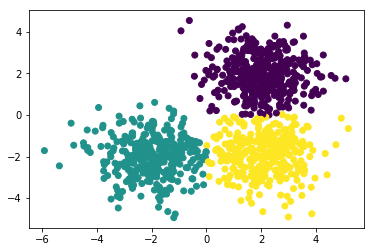

comparing the assigned categories with the predicted ones:
col_0    0    1    2
row_0               
0      357    0    5
1        1  310    9
2        7    5  306


In [87]:
from sklearn.cluster import SpectralClustering

# We know we're looking for 3 clusters
n_clusters = 3

# Declare and fit the model
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train,y_train)

# Predict clusters.
predict = sc.fit_predict(X_train)

# Graph Results
plt.scatter(X_train[:,0], X_train[:,1], c=predict)
plt.show()

print('comparing the assigned categories with the predicted ones:')
print(pd.crosstab(y_train,predict))

In [88]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Delcare the model and fit it in one statement
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters:', n_clusters_)

Done
Estimated number of clusters: 32


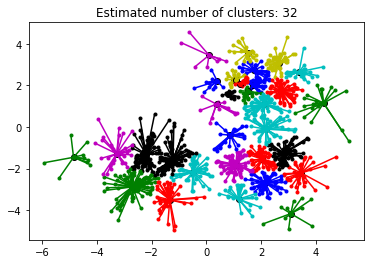

In [90]:
from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

In [98]:
def analysis(centers):
    # Setup up blob data
    centers = centers

    # Make 10,000 rows worth of data with two features representing three clusters
    # each having a standard deviation of 1
    X, y = make_blobs(n_samples=10000,
                     centers=centers,
                     cluster_std=1,
                     n_features=2,
                     random_state=42)

    plt.figure(figsize=(8,5))
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.title('Shape of Data')
    plt.show()

    # Divide into training and test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.9, random_state=42)
    
    # Initialize, fit, and setup a prediction for the K-Means model
    print('KMeans Testing:')
    y_pred = KMeans(n_clusters=len(centers), random_state=42).fit_predict(X_train)


    # Check the solution against the data.
    print('Comparing k-means clusters against the data:')
    print(pd.crosstab(y_pred, y_train))
    print()
    print()
    
    # Initial, fit and setup a prediction for the Mean-Shift model
    print('Mean Shift Testing:')
    bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

    # Declare and fit the model.
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(X_train)

    # Extract cluster assignments for each data point.
    labels = ms.labels_

    # Coordinates of the cluster centers.
    cluster_centers = ms.cluster_centers_

    # Count our clusters.
    n_clusters_ = len(np.unique(labels))
    print("Number of estimated clusters: {}".format(n_clusters_))
    
    plt.figure(figsize=(8,5))
    plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
    plt.title('Mean Shift')
    plt.show()
    print('Comparing the assigned categories to the ones in the data:')
    print(pd.crosstab(y_train,labels))
    print()
    print()
    
    # Initialize, fit and setup prediction for Spectral Shift
    print('Spectral Clustering Test:')
    n_clusters=len(centers)

    # Declare and fit the model.
    sc = SpectralClustering(n_clusters=n_clusters)
    sc.fit(X_train)

    #Predicted clusters.
    predict=sc.fit_predict(X_train)

    #Graph results.
    plt.figure(figsize=(8,5))
    plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
    plt.title('Spectral Clustering')
    plt.show()

    print('Comparing the assigned categories to the ones in the data:')
    print(pd.crosstab(y_train,predict))
    print()
    print()
    
    # Initialize, fit and setup prediction for Affinity Propagation
    print('Affinity Propagation Testing:')
    # Declare the model and fit it in one statement.
    # Note that you can provide arguments to the model, but we didn't.
    af = AffinityPropagation().fit(X_train)
    print('Done')

    # Pull the number of clusters and cluster assignments for each data point.
    cluster_centers_indices = af.cluster_centers_indices_
    n_clusters_ = len(cluster_centers_indices)
    labels = af.labels_

    print('Estimated number of clusters: {}'.format(n_clusters_))
    
    plt.figure(1, figsize=(8,5))
    plt.clf()

    # Cycle through each cluster and graph them with a center point for the
    # exemplar and lines from the exemplar to each data point in the cluster.
    colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
    for k, col in zip(range(n_clusters_), colors):
        class_members = labels == k
        cluster_center = X_train[cluster_centers_indices[k]]
        plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
        plt.plot(cluster_center[0],
                 cluster_center[1],
                 'o',
                 markerfacecolor=col,
                 markeredgecolor='k')
        for x in X_train[class_members]:
            plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

    plt.title('Estimated number of clusters: {}'.format(n_clusters_))
    plt.show()
    
    

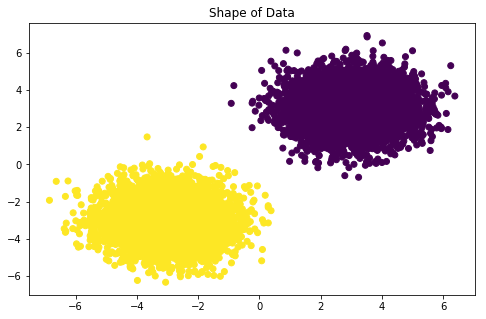

KMeans Testing:
Comparing k-means clusters against the data:
col_0    0    1
row_0          
0      512    0
1        0  488


Mean Shift Testing:
Number of estimated clusters: 2


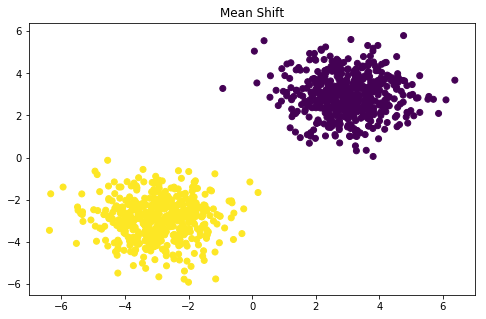

Comparing the assigned categories to the ones in the data:
col_0    0    1
row_0          
0      512    0
1        0  488


Spectral Clustering Test:


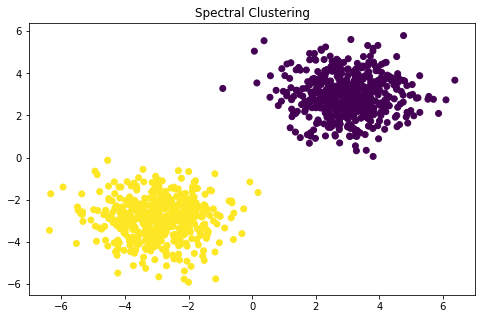

Comparing the assigned categories to the ones in the data:
col_0    0    1
row_0          
0      512    0
1        0  488


Affinity Propagation Testing:
Done
Estimated number of clusters: 128


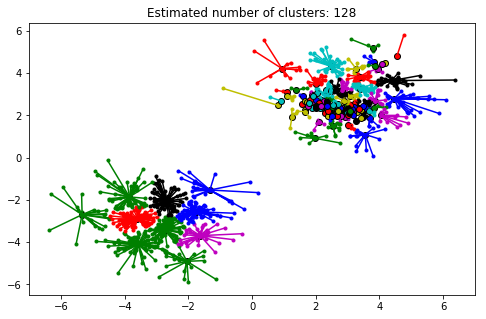

In [99]:
analysis([[3,3], [-3,-3]])

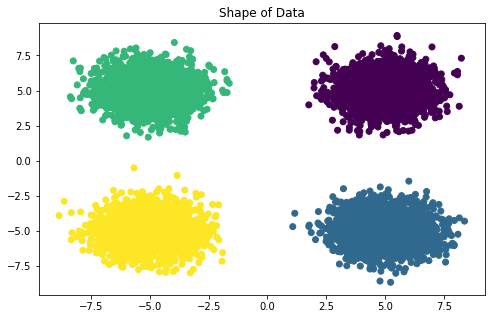

KMeans Testing:
Comparing k-means clusters against the data:
col_0    0    1    2    3
row_0                    
0      273    0    0    0
1        0    0    0  250
2        0    0  238    0
3        0  239    0    0


Mean Shift Testing:
Number of estimated clusters: 4


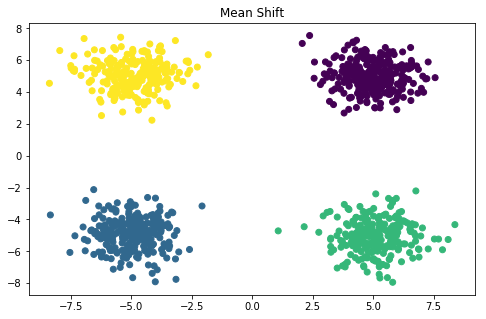

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0      273    0    0    0
1        0    0  239    0
2        0    0    0  238
3        0  250    0    0


Spectral Clustering Test:


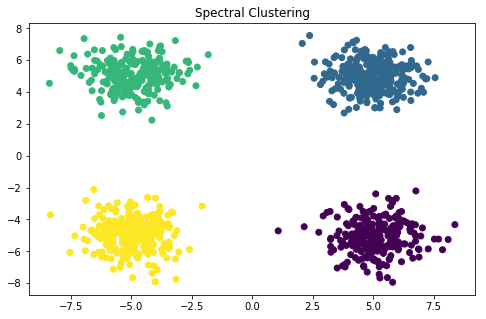

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0        0  273    0    0
1      239    0    0    0
2        0    0  238    0
3        0    0    0  250


Affinity Propagation Testing:
Done
Estimated number of clusters: 11


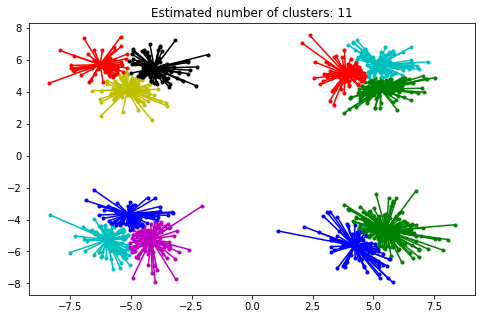

In [100]:
centers = [[5,5], [5,-5],[-5,5], [-5,-5]]
analysis(centers)

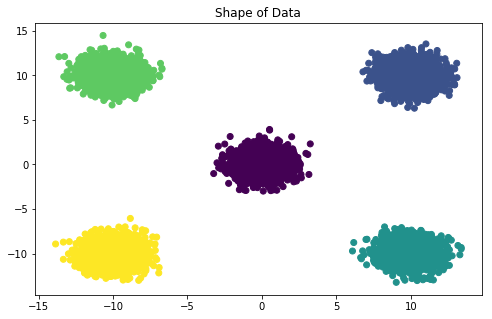

KMeans Testing:
Comparing k-means clusters against the data:
col_0    0    1    2    3    4
row_0                         
0      221    0    0    0    0
1        0    0    0  187    0
2        0    0    0    0  198
3        0    0  191    0    0
4        0  203    0    0    0


Mean Shift Testing:
Number of estimated clusters: 5


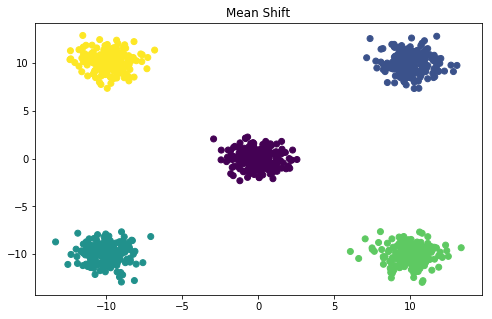

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3    4
row_0                         
0      221    0    0    0    0
1        0  203    0    0    0
2        0    0    0  191    0
3        0    0    0    0  187
4        0    0  198    0    0


Spectral Clustering Test:


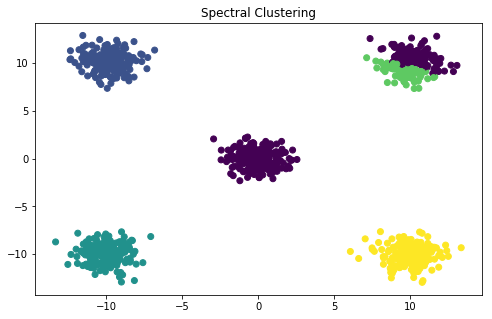

Comparing the assigned categories to the ones in the data:
col_0    0    1    2   3    4
row_0                        
0      221    0    0   0    0
1      124    0    0  79    0
2        0    0    0   0  191
3        0  187    0   0    0
4        0    0  198   0    0


Affinity Propagation Testing:
Done
Estimated number of clusters: 202


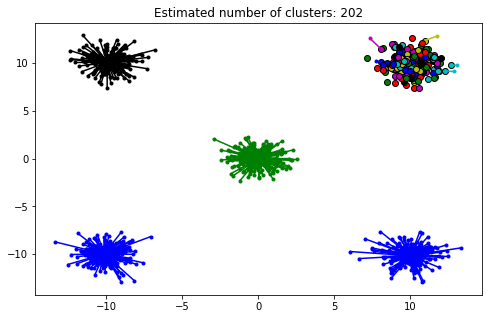

In [101]:
centers=[[0,0], [10,10], [10,-10], [-10,10], [-10,-10]]
analysis(centers)